# Job Classification Classifier using ML

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'

In [67]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [68]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/classification_015/jobclassinfo2.csv'

df = pd.read_csv(file_name)

df.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [69]:
df.describe()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,33.500000,7.606061,33.500000,5.696970,3.166667,1.757576,3.348485,3.606061,3.863636,4.757576,5.303030
std,19.196354,4.209436,19.196354,2.517445,1.525005,2.134411,1.767157,1.412894,2.104109,2.468638,3.525597
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.250000,4.000000,17.250000,4.000000,2.000000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000
50%,33.500000,7.000000,33.500000,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,6.000000,5.000000
75%,49.750000,11.000000,49.750000,8.000000,4.000000,2.750000,4.000000,5.000000,5.750000,7.000000,7.750000
max,66.000000,15.000000,66.000000,10.000000,6.000000,10.000000,6.000000,6.000000,7.000000,8.000000,11.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    66 non-null     int64 
 1   JobFamily             66 non-null     int64 
 2   JobFamilyDescription  66 non-null     object
 3   JobClass              66 non-null     int64 
 4   JobClassDescription   66 non-null     object
 5   PayGrade              66 non-null     int64 
 6   EducationLevel        66 non-null     int64 
 7   Experience            66 non-null     int64 
 8   OrgImpact             66 non-null     int64 
 9   ProblemSolving        66 non-null     int64 
 10  Supervision           66 non-null     int64 
 11  ContactLevel          66 non-null     int64 
 12  FinancialBudget       66 non-null     int64 
 13  PG                    66 non-null     object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB


In [71]:
df=df.dropna()
df.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

## Data Exploration

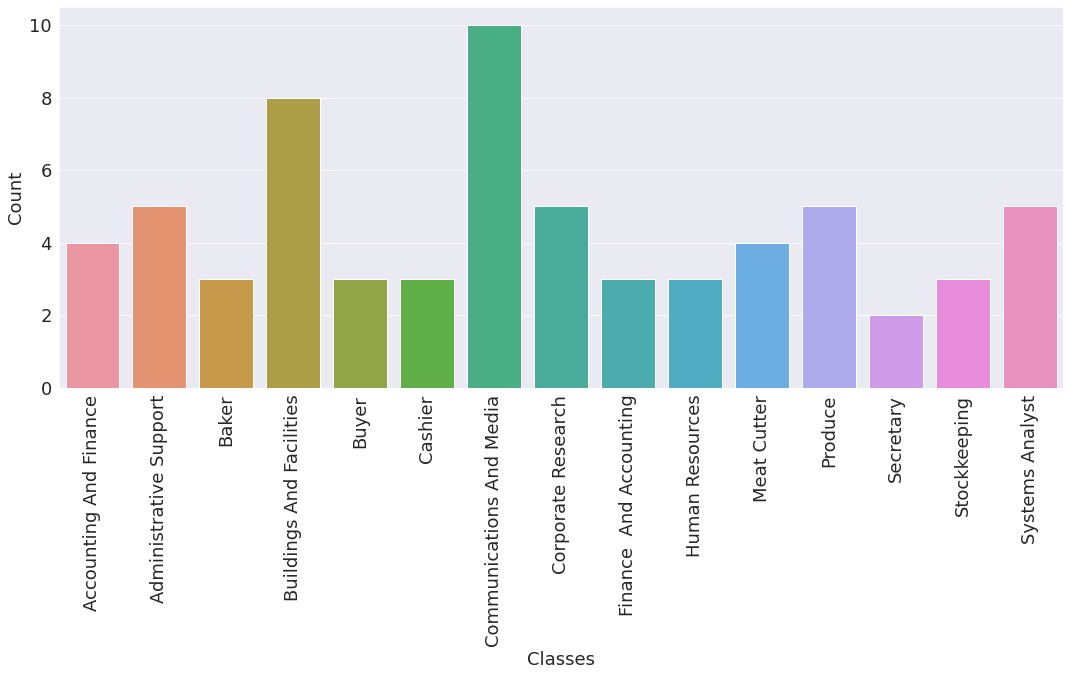

In [72]:
sns.countplot(df['JobFamilyDescription'])
plt.xlabel('Classes')
plt.ylabel("Count")
plt.xticks(rotation=90);

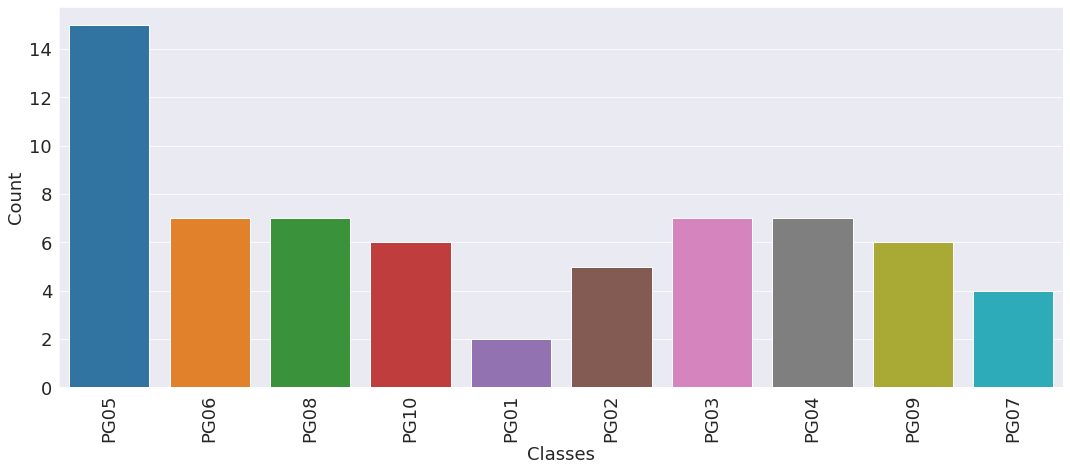

In [73]:
sns.countplot(df['PG'])
plt.xlabel('Classes')
plt.ylabel("Count")
plt.xticks(rotation=90);

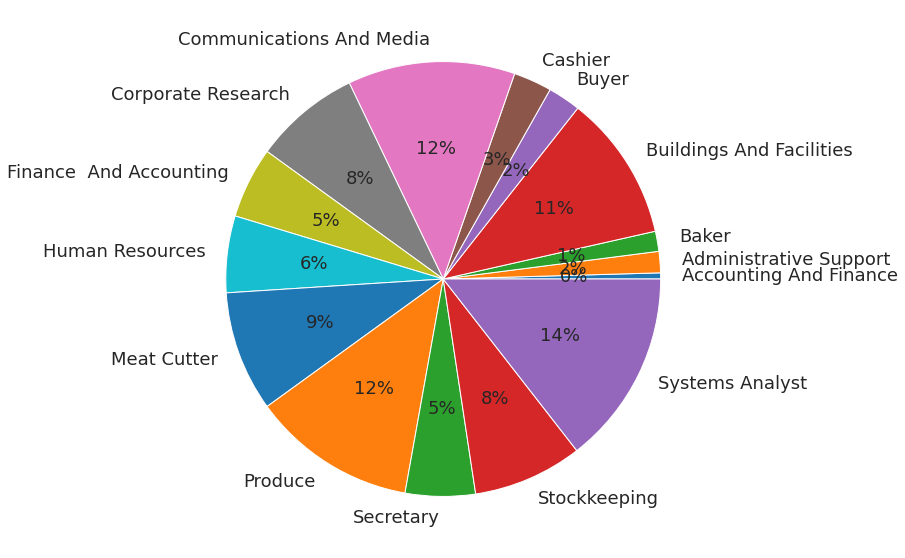

In [74]:
df_count = df.groupby(['JobFamilyDescription'])['JobClass'].sum().reset_index(name='count') 
plt.figure(figsize=(10,10))
plt.pie(df_count['count'],labels=df_count['JobFamilyDescription'],autopct='%1.0f%%');

## Encoding

In [75]:
# Encoding of objects using Label Encoder as we dont require One-Hot Encoding

from sklearn.preprocessing import LabelEncoder

features = df.select_dtypes("object").columns

le = LabelEncoder()

for feature in features: 
    df[feature] = le.fit_transform(df[feature])

In [76]:
df

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,0,1,0,5,3,1,3,3,4,3,5,4
1,2,1,0,2,1,6,4,1,5,4,5,7,7,5
2,3,1,0,3,2,8,4,2,6,5,6,7,10,7
3,4,1,0,4,3,10,5,5,6,6,7,8,11,9
4,5,2,1,5,4,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,15,14,62,61,3,1,1,1,2,1,1,1,2
62,63,15,14,63,62,5,4,1,3,3,4,3,4,4
63,64,15,14,64,63,6,5,2,4,4,5,7,5,5
64,65,15,14,65,64,8,5,5,6,5,6,7,7,7


## Target Variable Selection

In [77]:
X = df.drop(['PG'],axis=1)
Y = pd.DataFrame(df['PG'])


## Data Split

In [78]:
from sklearn.model_selection import train_test_split
#Splitting data into 30% for test and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

## Model Selection

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [80]:
#Linear SVM Classifier

sv = SVC(kernel="linear", C=0.025)

sv.fit(X_train, y_train)
print("Train Score: ", sv.score(X_train, y_train)*100 , "%")
print("Test Score: ", sv.score(X_test, y_test)*100, "%")

Train Score:  70.45454545454545 %
Test Score:  27.27272727272727 %


In [81]:
#Logistic Regression

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Train Score: ", lr.score(X_train, y_train)*100 , "%")
print("Test Score: ", lr.score(X_test, y_test)*100, "%")

Train Score:  65.9090909090909 %
Test Score:  18.181818181818183 %


In [82]:
# K Neighbours Classifier

kn = KNeighborsClassifier(3)

kn.fit(X_train, y_train)
print("Train Score: ", kn.score(X_train, y_train)*100 , "%")
print("Test Score: ", kn.score(X_test, y_test)*100, "%")

Train Score:  31.818181818181817 %
Test Score:  9.090909090909092 %


In [83]:
#Random Forest Classifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train)*100 , "%")
print("Test Score: ", rf.score(X_test, y_test)*100, "%")

Train Score:  90.9090909090909 %
Test Score:  27.27272727272727 %


In [84]:
# Naive Bayes Classifier

nb = GaussianNB()

nb.fit(X_train, y_train)
print("Train Score: ", nb.score(X_train, y_train)*100 , "%")
print("Test Score: ", nb.score(X_test, y_test)*100, "%")

Train Score:  100.0 %
Test Score:  77.27272727272727 %


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt.score(X_test, y_test)*100, "%")

Train Score:  100.0 %
Test Score:  95.45454545454545 %


## Model Evaluation

In [86]:
# Decision Tree is selected for better perfoemance and evaluation for the same is conducted.

y_pred = dt.predict(X_test)

print("Recall score:", recall_score(y_test, y_pred, average='macro'))
print("Precision score:", precision_score(y_test, y_pred, average='macro'))
print ("Confusio Matrix:\n", confusion_matrix(y_test, y_pred))

Recall score: 0.8888888888888888
Precision score: 0.8518518518518517
Confusio Matrix:
 [[0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 4]]


In [87]:
# K Neighbours Classifier

dt = KNeighborsClassifier(10)

dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt.score(X_test, y_test)*100, "%")

Train Score:  29.545454545454547 %
Test Score:  4.545454545454546 %


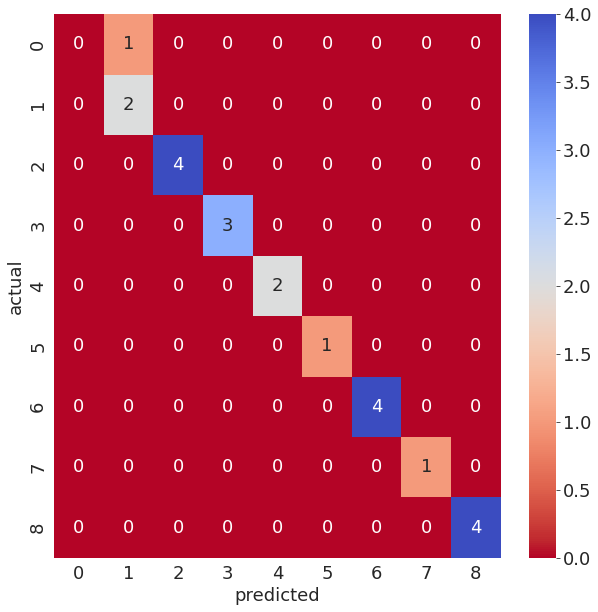

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm_r')
plt.xlabel('predicted')
plt.ylabel('actual');

# Model has been developed with 95% accuracy using Decision Tree Classifier